# Importing Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.subplots as sp
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_id = "10eibLsq4HWr1bdVz2k782SCOoHL_Lz5S"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Data Summary

In [ ]:
df.shape

(200, 6)

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.describe(include='object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [ ]:
df['Drug'].value_counts(normalize=True) * 100

,proportion
Drug,
DrugY,45.5
drugX,27.0
drugA,11.5
drugC,8.0
drugB,8.0


drugC and drugB has contains only 8% of data

In [ ]:
df['Sex'].value_counts(normalize=True) * 100

,proportion
Sex,
M,52.0
F,48.0


In [ ]:
df['BP'].value_counts(normalize=True) * 100

,proportion
BP,
HIGH,38.5
LOW,32.0
NORMAL,29.5


In [ ]:
for cols in cat_cols:
  print(df[cols].value_counts(normalize=True) * 100)
  print('\n')

Sex
M    52.0
F    48.0
Name: proportion, dtype: float64


BP
HIGH      38.5
LOW       32.0
NORMAL    29.5
Name: proportion, dtype: float64


Cholesterol
HIGH      51.5
NORMAL    48.5
Name: proportion, dtype: float64


Drug
DrugY    45.5
drugX    27.0
drugA    11.5
drugC     8.0
drugB     8.0
Name: proportion, dtype: float64




In [ ]:
df['Age'].value_counts().sort_values(ascending=False).head(5)

,count
Age,
47,8
28,7
49,7
23,7
39,6


In [ ]:
df['Age'].mode()

,Age
0,47


In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# EDA

## Univariate

In [ ]:
len(cat_cols)

4

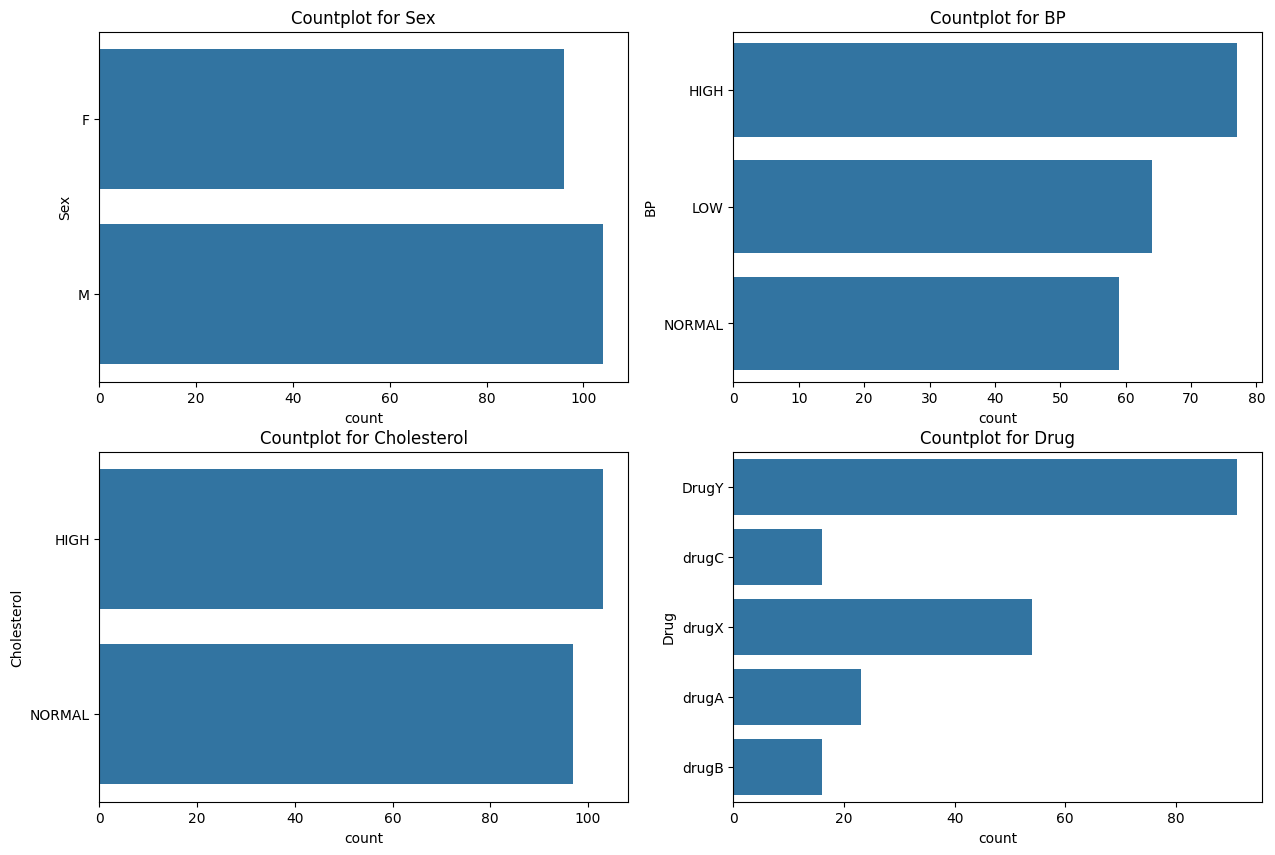

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(cat_cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(y=df[cat_cols[i]])
    plt.title(f'Countplot for {cat_cols[i]}')

plt.show()

**DrugY is have given to the most of the patients it is dominating all other Drug types**

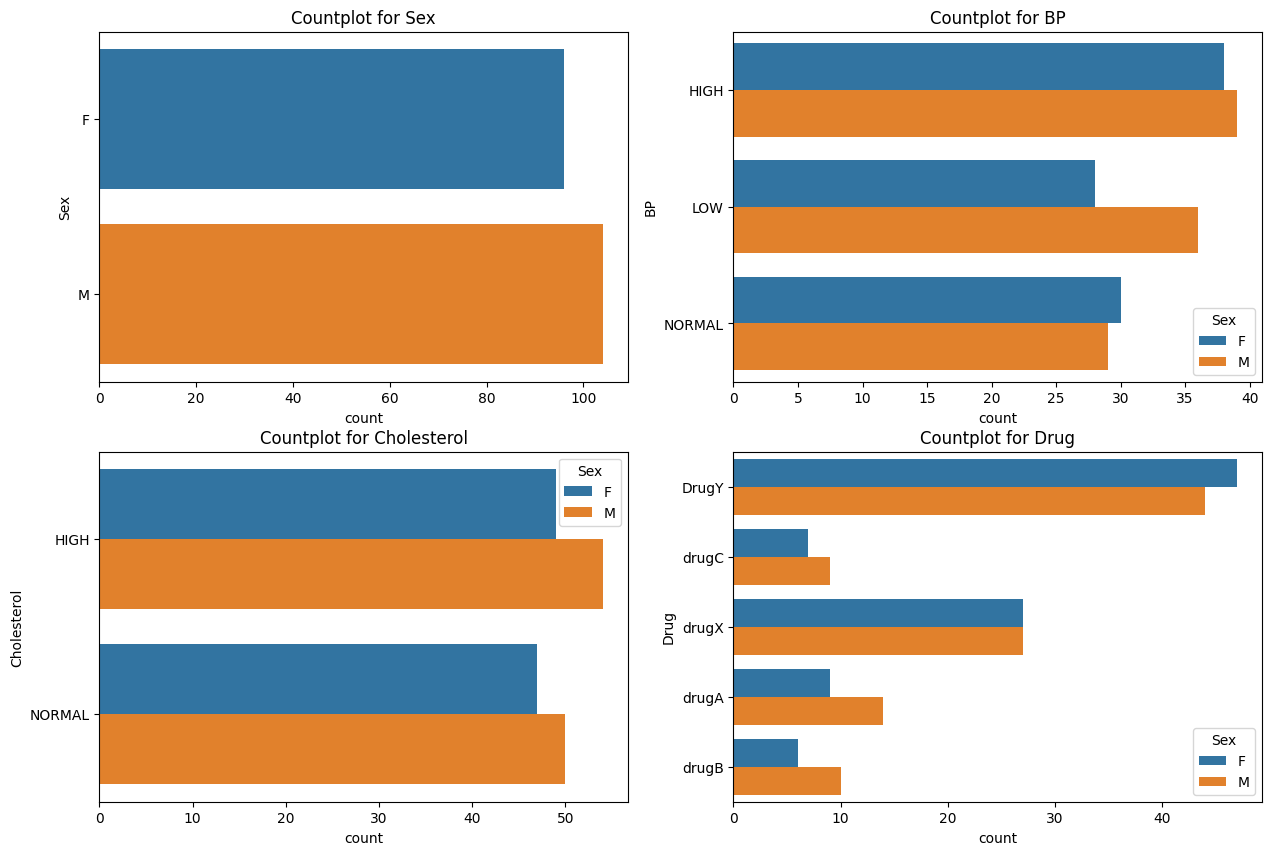

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(cat_cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(y=df[cat_cols[i]], hue = df['Sex'])
    plt.title(f'Countplot for {cat_cols[i]}')

plt.show()

1. **Male has higer risk of cholesterol**
2. **DrugY is used for the most of the female**
3. **DrugA and DrugB is used maximum for the males**

## Bivariate

In [ ]:
# creating bins for the age to make an age group

def age_group(age):
    if age <= 20:
        return '0-20'
    elif age <= 40:
        return '21-40'
    elif age <= 60:
        return '41-60'
    else:
        return '61+'

df['Age_group'] = df['Age'].apply(age_group)

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_group
0,23,F,HIGH,HIGH,25.355,DrugY,21-40
1,47,M,LOW,HIGH,13.093,drugC,41-60
2,47,M,LOW,HIGH,10.114,drugC,41-60
3,28,F,NORMAL,HIGH,7.798,drugX,21-40
4,61,F,LOW,HIGH,18.043,DrugY,61+


In [ ]:
# Age_group, Blood Pressure

Age_phase = pd.crosstab(index=df['Age_group'], columns=df['BP'])
Age_phase

BP,HIGH,LOW,NORMAL
Age_group,,,
0-20,10,2,4
21-40,29,20,22
41-60,24,28,21
61+,14,14,12


Text(0.5, 1.0, 'Age_group vs Drug')

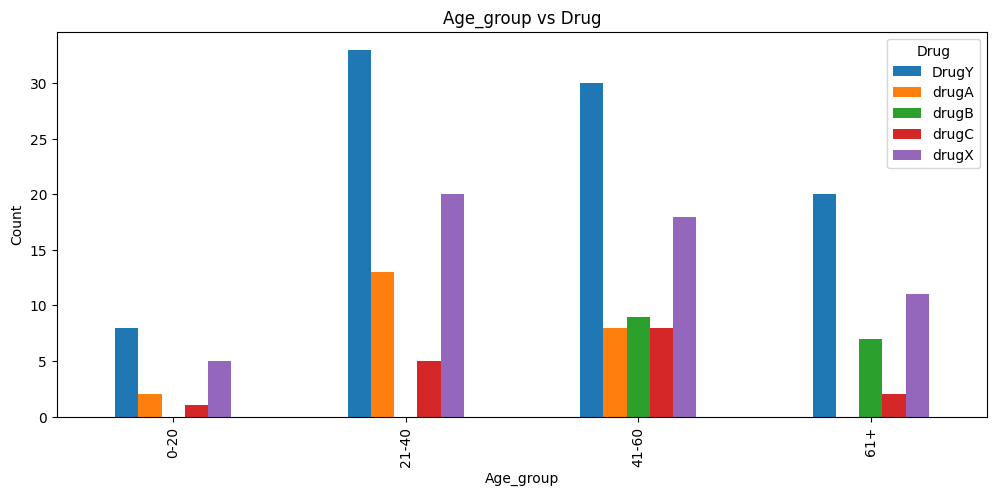

In [ ]:
Age_drug = pd.crosstab(index=df['Age_group'], columns=df['Drug'])
Age_drug

Age_drug.plot(kind='bar', figsize=(12,5), xlabel='Age_group', ylabel='Count')
plt.title('Age_group vs Drug')

1. **DurgY and DrugX is most used 21-40 age group**
2. **DrugC is used most for the Older Adults**

In [ ]:
Age_phase.plot(kind='bar', figsize=(12,5), xlabel='Age_group', ylabel='Count')
plt.title('Age_group vs Blood Pressure')

In [ ]:
cat_cols

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

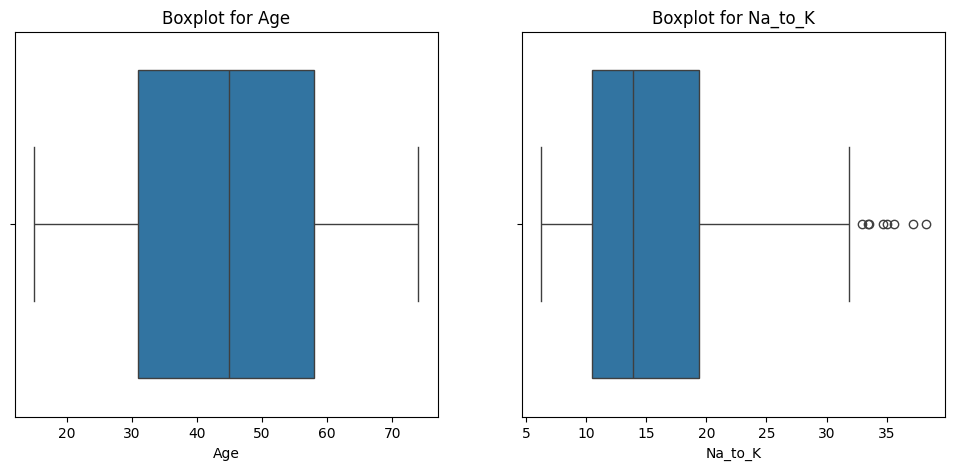

In [ ]:
plt.figure(figsize=(12,5))
for i in range(len(num_cols)):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

In [ ]:
df['Na_to_K'].min(), df['Na_to_K'].max()

(6.269, 38.247)

The actual physiological limits for the **sodium-to-potassium (Na/K) ratio** in the human body can vary depending on the source and the context, such as blood plasma, urine, or cellular levels. Here's a general guideline:

1. **Normal Serum Sodium (Na)**:  
   - Range: **135–145 mmol/L**.

2. **Normal Serum Potassium (K)**:  
   - Range: **3.5–5.0 mmol/L**.

3. **Normal Na/K Ratio in Serum**:  
   - Typical range: **25–40** (based on physiological balance).

The ratio can differ for other mediums (e.g., urine, intracellular fluid). For example:  
- **Urine Na/K Ratio** can be lower than serum levels due to different excretion patterns.

### Clipping Your Dataset
Given your dataset's `Na_to_K` values (6.269, 38.247), these are within the **serum Na/K ratio range (25–40)**, though the lower end might indicate a specific condition (e.g., excess potassium or low sodium). If you're modeling based on serum levels, clip values to this range:  
- **Min**: 25  
- **Max**: 40  

If this is not the exact physiological context (e.g., urine), let me know so I can adjust accordingly!

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Na_to_K'].quantile(0.25)
Q3 = df['Na_to_K'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df['Na_to_K'] = df['Na_to_K'].clip(lower=lower_bound, upper=upper_bound)

# Print bounds
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Lower bound: -2.9562500000000007, Upper bound: 32.78175


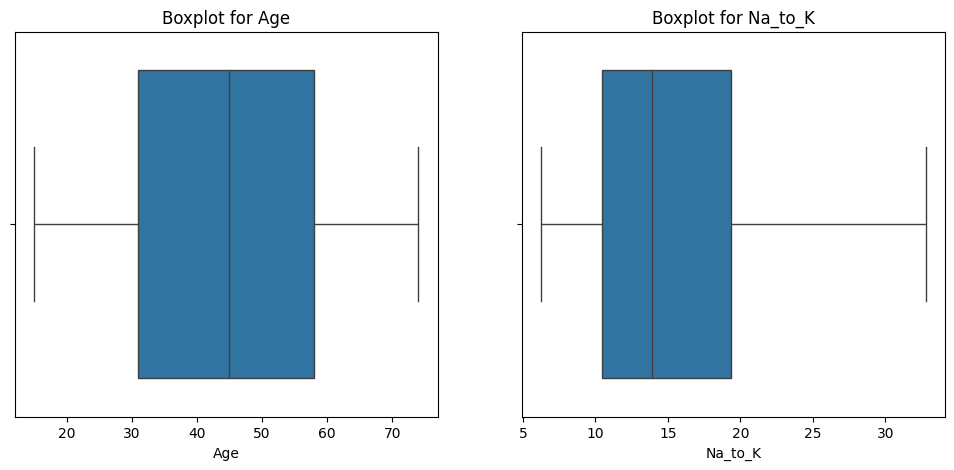

In [ ]:
plt.figure(figsize=(12,5))
for i in range(len(num_cols)):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.show()

# Model Evaluation

In [ ]:
df.drop('Age_group', axis=1, inplace=True)

In [ ]:
df.select_dtypes(include='object').columns

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [ ]:
c_col = ['Sex', 'BP', 'Cholesterol', 'Drug']

In [ ]:
c_col[:-1] , c_col[-1]

(['Sex', 'BP', 'Cholesterol'], 'Drug')

In [ ]:
#1 - Dummy Variables

df_dummies = pd.get_dummies(data=df[:-2],
                            columns=c_col[:-1],
                            drop_first=True)
df_dummies.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,False,False,False,False
1,47,13.093,drugC,True,True,False,False
2,47,10.114,drugC,True,True,False,False
3,28,7.798,drugX,False,False,True,False
4,61,18.043,DrugY,False,True,False,False


In [ ]:
df_dummies.dtypes

,0
Age,int64
Na_to_K,float64
Drug,object
Sex_M,bool
BP_LOW,bool
BP_NORMAL,bool
Cholesterol_NORMAL,bool


In [ ]:
df_dummies.columns.to_list()

['Age',
 'Na_to_K',
 'Drug',
 'Sex_M',
 'BP_LOW',
 'BP_NORMAL',
 'Cholesterol_NORMAL']

In [ ]:
['Age', 'Na_to_K', 'Drug', 'Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL']

In [ ]:
x = df_dummies.drop('Drug', axis=1)
y = df_dummies['Drug']
#

In [ ]:
# Train test and split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,
                                                 random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(138, 6)
(60, 6)
(138,)
(60,)


In [ ]:
from sklearn.metrics import *

def eval_model(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)   # Train Acc
    test_acc = model.score(x_test,y_test)      # Test Acc
    cm = confusion_matrix(y_test,ypred)
    crep = classification_report(y_test,ypred)
    print(cm)
    print(crep)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},
                         index = [mname])
    return res_df

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr1 = eval_model(lr,'Logistic Regression')
lr1

[[23  0  0  0  1]
 [ 3  5  0  0  2]
 [ 1  2  2  0  0]
 [ 1  0  1  3  0]
 [ 1  0  0  0 15]]
              precision    recall  f1-score   support

       DrugY       0.79      0.96      0.87        24
       drugA       0.71      0.50      0.59        10
       drugB       0.67      0.40      0.50         5
       drugC       1.00      0.60      0.75         5
       drugX       0.83      0.94      0.88        16

    accuracy                           0.80        60
   macro avg       0.80      0.68      0.72        60
weighted avg       0.80      0.80      0.78        60



,Train_Acc,Test_Acc
Logistic Regression,0.891304,0.8


## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn1 = eval_model(knn,'KNN')
knn1

[[23  1  0  0  0]
 [ 0  5  0  1  4]
 [ 0  0  3  0  2]
 [ 0  0  2  0  3]
 [ 1  5  2  4  4]]
              precision    recall  f1-score   support

       DrugY       0.96      0.96      0.96        24
       drugA       0.45      0.50      0.48        10
       drugB       0.43      0.60      0.50         5
       drugC       0.00      0.00      0.00         5
       drugX       0.31      0.25      0.28        16

    accuracy                           0.58        60
   macro avg       0.43      0.46      0.44        60
weighted avg       0.58      0.58      0.58        60



,Train_Acc,Test_Acc
KNN,0.811594,0.583333


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt1 = eval_model(dt,'Decision Tree')
dt1

[[24  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  1  4  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 16]]
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        24
       drugA       0.91      1.00      0.95        10
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        16

    accuracy                           0.98        60
   macro avg       0.98      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60



,Train_Acc,Test_Acc
Decision Tree,1.0,0.983333


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf1 = eval_model(rf,'Random Forest')
rf1

[[24  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  1  4  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 16]]
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        24
       drugA       0.91      1.00      0.95        10
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        16

    accuracy                           0.98        60
   macro avg       0.98      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60



,Train_Acc,Test_Acc
Random Forest,1.0,0.983333


In [ ]:
res_df = pd.concat([eval_model(lr,'Logistic Regression'),
                   eval_model(knn,'KNN'),
                   eval_model(dt,'Decision Tree'),
                   eval_model(rf,'Random Forest')])
res_df

[[23  0  0  0  1]
 [ 3  5  0  0  2]
 [ 1  2  2  0  0]
 [ 1  0  1  3  0]
 [ 1  0  0  0 15]]
              precision    recall  f1-score   support

       DrugY       0.79      0.96      0.87        24
       drugA       0.71      0.50      0.59        10
       drugB       0.67      0.40      0.50         5
       drugC       1.00      0.60      0.75         5
       drugX       0.83      0.94      0.88        16

    accuracy                           0.80        60
   macro avg       0.80      0.68      0.72        60
weighted avg       0.80      0.80      0.78        60

[[23  1  0  0  0]
 [ 0  5  0  1  4]
 [ 0  0  3  0  2]
 [ 0  0  2  0  3]
 [ 1  5  2  4  4]]
              precision    recall  f1-score   support

       DrugY       0.96      0.96      0.96        24
       drugA       0.45      0.50      0.48        10
       drugB       0.43      0.60      0.50         5
       drugC       0.00      0.00      0.00         5
       drugX       0.31      0.25      0.28        16

   

,Train_Acc,Test_Acc
Logistic Regression,0.891304,0.800000
KNN,0.811594,0.583333
Decision Tree,1.000000,0.983333
Random Forest,1.000000,0.966667


In [ ]:
res_df = pd.concat([lr1,knn1,dt1,rf1])
res_df

,Train_Acc,Test_Acc
Logistic Regression,0.891304,0.800000
KNN,0.811594,0.583333
Decision Tree,1.000000,0.983333
Random Forest,1.000000,0.983333


**Logistic Regression has given the best results for Classification and achived 89 % score**

In [ ]:
# From the above evaluation the best model for this purpose is Random Forest

In [ ]:
y_pred = rf.predict(x_test)
y_pred

array(['DrugY', 'drugX', 'drugX', 'DrugY', 'drugA', 'DrugY', 'drugA',
       'drugX', 'drugC', 'drugX', 'drugC', 'DrugY', 'drugC', 'drugB',
       'DrugY', 'drugX', 'drugB', 'DrugY', 'drugA', 'drugB', 'drugX',
       'drugB', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugC', 'DrugY',
       'drugA', 'DrugY', 'drugX', 'DrugY', 'drugA', 'drugA', 'drugX',
       'drugA', 'drugA', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'drugC', 'DrugY', 'drugX',
       'drugA', 'DrugY', 'drugX', 'drugX'], dtype=object)